<a href="https://www.kaggle.com/code/thirumani/dragons-den-uk-data-analysis?scriptVersionId=193747431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2024-Aug-23 with Python version
Python 3.10.14


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/9/99/DragonsDenUK17.png', width=430, height=240)

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

In [4]:
! ls -l /kaggle/input/dragons-den-uk-dataset/
dragons_den = pd.read_csv('/kaggle/input/dragons-den-uk-dataset/Dragons Den UK dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = dragons_den.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 40
-rw-r--r-- 1 nobody nogroup 39828 Aug 23 14:47 'Dragons Den UK dataset.csv'

There are 188 rows and 53 columns in the dataset


In [5]:
dragons_den.head(5)

Season Number                        Startup Name  Episode Number  \
0              1                            Umbrolly               1   
1              1                         Grails Ltd1               2   
2              1                          Le Beanock               3   
3              1  IV Cam, Industrial Control Systems               3   
4              1                 Mycorrhizal Systems               4   

   Pitch Number Season Start Season End Original Air Date           Industry  \
0             1     4-Jan-05   8-Feb-05          4-Jan-05  Business Services   
1             2     4-Jan-05   8-Feb-05         11-Jan-05     Fashion/Beauty   
2             3     4-Jan-05   8-Feb-05         18-Jan-05     Lifestyle/Home   
3             4     4-Jan-05   8-Feb-05         18-Jan-05  Business Services   
4             5     4-Jan-05   8-Feb-05         25-Jan-05    Green/CleanTech   

                                Business Description  Company Website  \
0  Multimedia vending unit selling umbrellas and ...              NaN   
1                Tailor-made suits for businesswomen              NaN   
2                                  A beanbag hammock              NaN   
3      A 3D measuring system using camera technology              NaN   
4                            Land for a truffle farm              NaN   

   Pitchers Gender  Pitchers Average Age  Pitchers City  Pitchers State  \
0              NaN                   NaN            NaN             NaN   
1              NaN                   NaN            NaN             NaN   
2              NaN                   NaN            NaN             NaN   
3              NaN                   NaN            NaN             NaN   
4              NaN                   NaN            NaN             NaN   

       Entrepreneur Names  Multiple Entrepreneurs  UK Viewership  \
0           Charles Ejogo                       0            NaN   
1       Tracey Ann Graily                       0            NaN   
2         Tracie Herrtage                       0            NaN   
3  John and Phillip Petty                       1            NaN   
4             Paul Thomas                       0            NaN   

   Original Ask Amount  Original Offered Equity  Valuation Requested  \
0               150000                     40.0               375000   
1               120000                     40.0               300000   
2                54000                     49.0               110204   
3                50000                     30.0               166667   
4                75000                     25.0               300000   

   Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
0         1           150000.0               40.0        375000.0   
1         1           120000.0               40.0        300000.0   
2         1            54000.0               49.0        110204.0   
3         0                NaN                NaN             NaN   
4         0                NaN                NaN             NaN   

   Number of Dragons in Deal  ...  Advisory Shares Equity  Loan  \
0                        2.0  ...                     NaN   NaN   
1                        2.0  ...                     NaN   NaN   
2                        1.0  ...                     NaN   NaN   
3                        NaN  ...                     NaN   NaN   
4                        NaN  ...                     NaN   NaN   

   Deal Has Conditions  Peter Jones Investment Amount  \
0                  NaN                        75000.0   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN                            NaN   
4                  NaN                            NaN   

   Peter Jones Investment Equity Deborah Meaden Investment Amount  \
0                           20.0                              NaN   
1                            NaN                          

In [6]:
dragons_den.tail(10).T

178  \
Season Number                                                                      13   
Startup Name                                                               Liquiproof   
Episode Number                                                                     11   
Pitch Number                                                                      179   
Season Start                                                                12-Jul-15   
Season End                                                                  21-Feb-16   
Original Air Date                                                            3-Jan-16   
Industry                                                               Fashion/Beauty   
Business Description                Waterproof coating for footwear, hats and clot...   
Company Website                                                                   NaN   
Pitchers Gender                                                                   NaN   
Pitchers Average Age                                                              NaN   
Pitchers City                                                                     NaN   
Pitchers State                                                                    NaN   
Entrepreneur Names                                                         Caner Veli   
Multiple Entrepreneurs                                                              0   
UK Viewership                                                                     NaN   
Original Ask Amount                                                            100000   
Original Offered Equity                                                          50.0   
Valuation Requested                                                            200000   
Got Deal                                                                            1   
Total Deal Amount                                                            100000.0   
Total Deal Equity                                                                50.0   
Deal Valuation                                                               200000.0   
Number of Dragons in Deal                                                         1.0   
Investment Amount Per Dragon                                                 100000.0   
Equity Per Dragon                                                                50.0   
Royalty Deal                                                                      NaN   
Advisory Shares Equity                                                            NaN   
Loan                                                                              NaN   
Deal Has Conditions                                                               NaN   
Peter Jones Investment Amount                                                     NaN   
Peter Jones Investment Equity                                                     NaN   
Deborah Meaden Investment Amount                                                  NaN   
Deborah Meaden Investment Equity                                                  NaN   
Duncan Bannatyne Investment Amount                                                NaN   
Duncan Bannatyne Investment Equity                                                NaN   
Theo Paphitis Investment Amount                                                   NaN   
Theo Paphitis Investment Equity                                                   NaN   
Touker Suleyman Investment Amount                                            100000.0   
Touker Suleyman Investment Equity                                                50.0   
Sara Davies Investment Amount                                                     NaN   
Sara Davies Investment Equity                                                     NaN   
Guest Investment Amount                                                           NaN   
Guest Investment Equity                                                      

In [7]:
dragons_den['Season Number'] = dragons_den['Season Number'].astype(pd.Int32Dtype())
dragons_den['Episode Number'] = dragons_den['Episode Number'].astype(pd.Int32Dtype())
dragons_den['Pitch Number'] = dragons_den['Pitch Number'].astype(pd.Int32Dtype())

dragons_den['Startup Name'] = dragons_den['Startup Name'].astype(str)
dragons_den['Industry'] = dragons_den['Industry'].astype(str)
dragons_den['Business Description'] = dragons_den['Business Description'].astype(str)

dragons_den['Multiple Entrepreneurs'] = dragons_den['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
dragons_den.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
dragons_den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       188 non-null    Int32  
 1   Startup Name                        188 non-null    object 
 2   Episode Number                      188 non-null    Int32  
 3   Pitch Number                        188 non-null    Int32  
 4   Season Start                        188 non-null    object 
 5   Season End                          188 non-null    object 
 6   Original Air Date                   188 non-null    object 
 7   Industry                            188 non-null    object 
 8   Business Description                188 non-null    object 
 9   Company Website                     0 non-null      float64
 10  Pitchers Gender                     0 non-null      float64
 11  Pitchers Average Age                0 non-nul

In [10]:
dragons_den.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in dragons_den.columns:
    print("Number of unique values in", col, "-", dragons_den[col].nunique())

Number of unique values in Season Number - 13
Number of unique values in Startup Name - 188
Number of unique values in Episode Number - 15
Number of unique values in Pitch Number - 188
Number of unique values in Season Start - 13
Number of unique values in Season End - 13
Number of unique values in Original Air Date - 119
Number of unique values in Industry - 16
Number of unique values in Business Description - 188
Number of unique values in Company Website - 0
Number of unique values in Pitchers Gender - 0
Number of unique values in Pitchers Average Age - 0
Number of unique values in Pitchers City - 0
Number of unique values in Pitchers State - 0
Number of unique values in Entrepreneur Names - 188
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in UK Viewership - 0
Number of unique values in Original Ask Amount - 32
Number of unique values in Original Offered Equity - 23
Number of unique values in Valuation Requested - 74
Number of unique values in Got De

In [12]:
# Latest/current season data
dragons_den_recent = dragons_den.loc[(dragons_den['Season Number']==15)]

In [13]:
# Data set information
print(dragons_den['Season Number'].max(), "total seasons in UK Dragons' Den\n")
print(dragons_den['Pitch Number'].max(), "#startups came for pitching \n")

13 total seasons in UK Dragons' Den

188 #startups came for pitching 



Season Number   1   2   3   4   5   6   7   8   9   10  11  12  13
Episode Number   6   5   8   6   9   8   8  10  10  13  12  12  15


([], [])

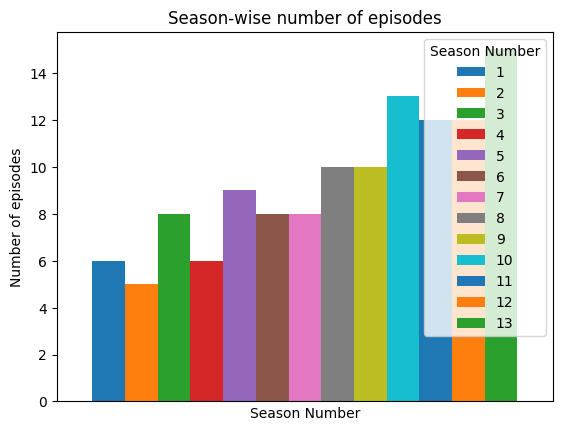

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(dragons_den, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
tmp.plot(kind='bar', use_index=False, width=3.0)
plt.xlabel("Season Number")
plt.ylabel("Number of episodes")
plt.title("Season-wise number of episodes")
plt.xticks([])

In [15]:
# Season-wise number of pitches
tmp = dragons_den['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Dragons' Den UK - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=490, height=640)
fig.update_yaxes(tickvals=list(range(16)))
fig.update_xaxes(visible=False)
fig.show()

In [16]:
# There were 1-3 pitches, in a each episode
print(dragons_den[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[1 2 3]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = dragons_den['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Dragons' Den British - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [18]:
# # Types of industries, came for investment, in current/latest season (15th season)
# tmp = dragons_den_recent['Industry'].value_counts().sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b> UK Dragons' Den in current/latest season (15th season) - Industry wise startups</b>", template='simple_white', text=tmp, width=820, height=650)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [19]:
# # Gender wise
# print(dragons_den['Pitchers Gender'].value_counts(),"\n")

# # In percentage
# print(round(dragons_den['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Gender wise percentage")
# dragons_den["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)
# plt.ylabel('')

In [20]:
# # Age wise
# print(dragons_den['Pitchers Average Age'].value_counts(),"\n")

# # In percentage
# print(round(dragons_den['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

# plt.title("Pitchers Age wise percentage")
# dragons_den["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)
# plt.ylabel('')

Got Deal
0    98
1    90
Name: count, dtype: int64 

Got Deal
0    52%
1    48%
Name: proportion, dtype: object


Text(0, 0.5, '')

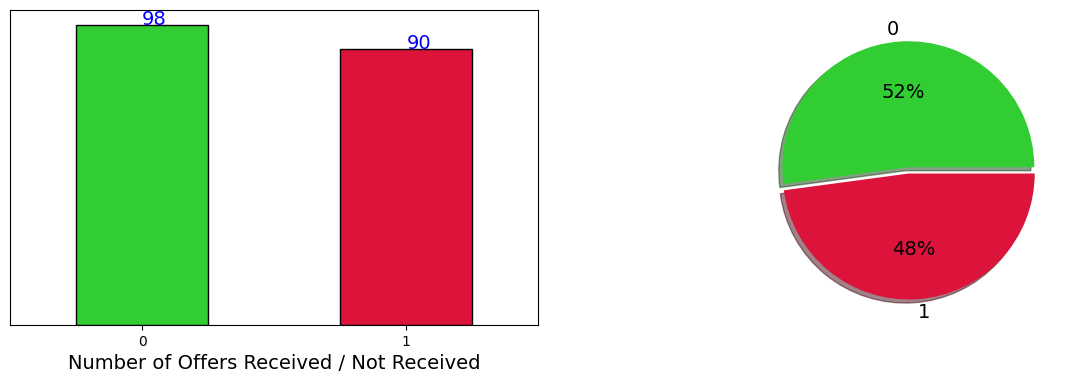

In [21]:
# Offers received
print(dragons_den['Got Deal'].value_counts(), "\n")
print(round(dragons_den['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
dragons_den["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received", size=14)
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(dragons_den["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")

ax2 = plt.subplot(222)
dragons_den["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)
plt.ylabel('')

# 808 companies received offers & 529 startups could not convince #Dragons to invest.

In [22]:
# # Gender wise distribution, who received the offer
# print(dragons_den[dragons_den['Got Deal']==1]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who received the offer")
# dragons_den[dragons_den['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange"], fontsize=14)
# plt.ylabel('')

In [23]:
# # Gender wise distribution, who could NOT receive the offer
# print(dragons_den[dragons_den['Got Deal']==0]['Pitchers Gender'].value_counts())
# plt.title("Gender wise distribution, who could NOT receive the offer")
# dragons_den[dragons_den['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%', fontsize=14)
# plt.ylabel('')

In [24]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(dragons_den['Original Ask Amount'].max(), 'GBP', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - £250,000


In [25]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(dragons_den['Original Ask Amount'].min(), 'GBP', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - £25,000


In [26]:
# Sum of investment amount asked, in Dragons' Den UK
print("Sum of investment amount asked, by all startup companies, in UK Dragons' Den -", format_currency(dragons_den['Original Ask Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in UK Dragons' Den - £16,187,500


In [27]:
# Amount invested by all Dragons, in UK Dragons' Den
print("Amount invested by all Dragons, in Dragons' Den UK -", format_currency(dragons_den['Total Deal Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))

Amount invested by all Dragons, in Dragons' Den UK - £7,429,000


In [28]:
# Sum of loan/debt amount, in American Dragons' Den
print("Sum of loan/debt amount, given by all Dragons, in American Dragons' Den -", format_currency(dragons_den['Loan'].sum(), 'GBP', locale='en_US').replace(".00", ""))

Sum of loan/debt amount, given by all Dragons, in American Dragons' Den - £0


In [29]:
# Top 15 investments, as per total investment/deal amount
print(dragons_den.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

tmpdf = dragons_den.sort_values('Total Deal Amount', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest investment as per deal amount", text=tmpdf['Total Deal Amount'].map(float).map(str))
fig.show()

Startup Name
Gaming Alerts                   200000.0
ProWaste Management Services    200000.0
The Wand Company                200000.0
Visual Talent Ltd               175000.0
Igloo                           160000.0
The Generating Company          160000.0
ElectroExpo                     150000.0
MixAlbum                        150000.0
Rapstrap                        150000.0
Square Mile                     150000.0
Umbrolly                        150000.0
Steri Spray                     145000.0
iTeddy                          140000.0
Grails Ltd1                     120000.0
Ploughcroft Solar               120000.0
Name: Total Deal Amount, dtype: float64


In [30]:
# Top 20 investments, as per total equity/shares percentage diluted
print(dragons_den.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = dragons_den.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()


Startup Name
RKA Records                  79.0
Bare Naked Foods             50.0
BeamBlock                    50.0
Blindsinabox                 50.0
Caribbean Ready Meals        50.0
Fit Fur Life                 50.0
Liquiproof                   50.0
Rapstrap                     50.0
Le Beanock                   49.0
Sweet-Escott Aviation Ltd    49.0
Love Da Pop                  45.0
RemPods                      45.0
Slappie Ltd                  45.0
youdoodoll                   45.0
Accentuate                   40.0
Billy + Margot               40.0
Concentrate Design           40.0
D4M Ltd                      40.0
Ella Banks Ltd               40.0
Goldgenie                    40.0
Name: Total Deal Equity, dtype: float64


In [31]:
# Startups who sold (exactly) 1/3rd of their company (equity) to Dragons
print(dragons_den.loc[dragons_den['Total Deal Equity'] == 33.33][["Startup Name"]].count())
print(dragons_den.loc[dragons_den['Total Deal Equity'] == 33.33][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = dragons_den.loc[dragons_den['Total Deal Equity'] == 33.33]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name    2
dtype: int64
     Season Number                 Startup Name  Total Deal Equity
120             10  A Turner & Sons Sausage Ltd              33.33
174             13                       Yogiyo              33.33


In [32]:
# # Startups who got Debt/loan amount
# print("Number of startups who got debt/loan amount", dragons_den['Loan'].count(),"\n")

# dragons_den.loc[dragons_den['Loan'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Loan"]]

In [33]:
# # Startups who gave Royalty
# print("Number of startups who gave Royalty", dragons_den['Royalty Deal'].count(),"\n")

# dragons_den.loc[dragons_den['Royalty Deal'] == 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

In [34]:
# # Startups who gave Advisory shares
# print("Number of startups who gave Advisory shares/equity", dragons_den['Advisory Shares Equity'].count(),"\n")

# dragons_den.loc[dragons_den['Advisory Shares Equity'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity", "Advisory Shares Equity"]]

In [35]:
# Deals with conditions
print("Number of startups who accepted conditional deals", dragons_den['Deal Has Conditions'].count(),"\n")

dragons_den.loc[dragons_den['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 6 



Season Number   Startup Name  Total Deal Amount  Total Deal Equity
115             10  Intern Avenue           100000.0               40.0
117             10      WoodBlocX            75000.0               25.0
133             11        RemPods           100000.0               45.0
156             12    Zeven Media            50000.0               25.0
167             13     Accentuate            45000.0               40.0
169             13       Sync-box            55000.0               35.0

In [36]:
# # Gender/age wise pitchers combination
# dragons_den.groupby([dragons_den['Pitchers Gender'], dragons_den['Pitchers Average Age'], dragons_den['Multiple Entrepreneurs']]).size().nlargest(10)

# # Groups/Couples in middle age is most frequent combination followed by Male/Female in middle age

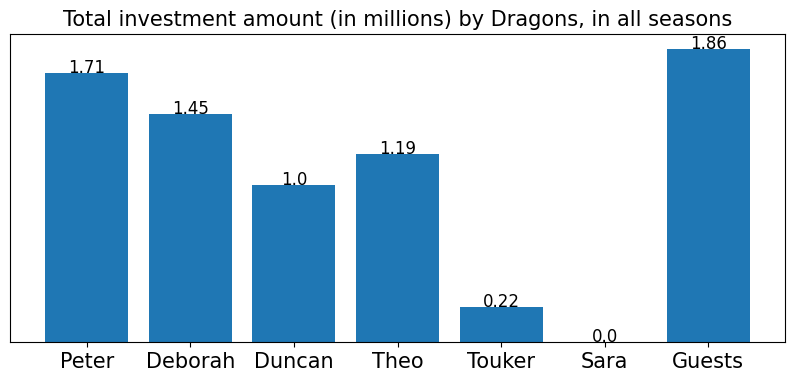

In [37]:
# Amount Invested by Dragons
Amount = [(dragons_den['Peter Jones Investment Amount']/1000000).sum(), (dragons_den['Deborah Meaden Investment Amount']/1000000).sum(), (dragons_den['Duncan Bannatyne Investment Amount']/1000000).sum(), (dragons_den['Theo Paphitis Investment Amount']/1000000).sum(),
    (dragons_den['Touker Suleyman Investment Amount']/1000000).sum(), (dragons_den['Sara Davies Investment Amount']/1000000).sum(), (dragons_den['Guest Investment Amount']/1000000).sum()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Dragons, in all seasons", fontsize=15)
plt.show()

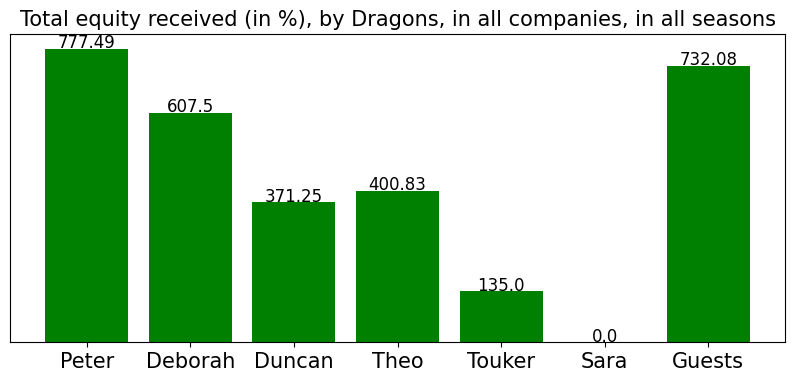

In [38]:
# Equity received by Dragons, in all seasons
Equity = [dragons_den['Peter Jones Investment Equity'].sum(), dragons_den['Deborah Meaden Investment Equity'].sum(), dragons_den['Duncan Bannatyne Investment Equity'].sum(), dragons_den['Theo Paphitis Investment Equity'].sum(),
    dragons_den['Touker Suleyman Investment Equity'].sum(), dragons_den['Sara Davies Investment Equity'].sum(), dragons_den['Guest Investment Equity'].sum()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Dragons, in all companies, in all seasons", fontsize=15)
plt.show()

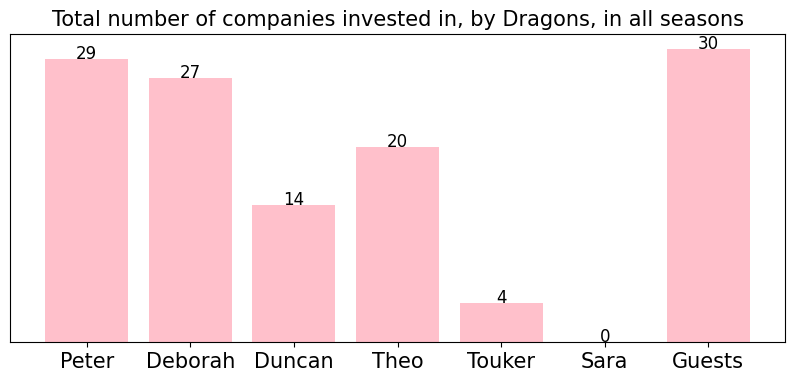

In [39]:
# Number of companies invested
Amount = [(dragons_den['Peter Jones Investment Amount']).count(), (dragons_den['Deborah Meaden Investment Amount']).count(), (dragons_den['Duncan Bannatyne Investment Amount']).count(), (dragons_den['Theo Paphitis Investment Amount']).count(),
    (dragons_den['Touker Suleyman Investment Amount']).count(), (dragons_den['Sara Davies Investment Amount']).count(), (dragons_den['Guest Investment Amount']).count()]
name=['Peter','Deborah','Duncan','Theo','Touker','Sara','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested in, by Dragons, in all seasons", fontsize=15)
plt.show()

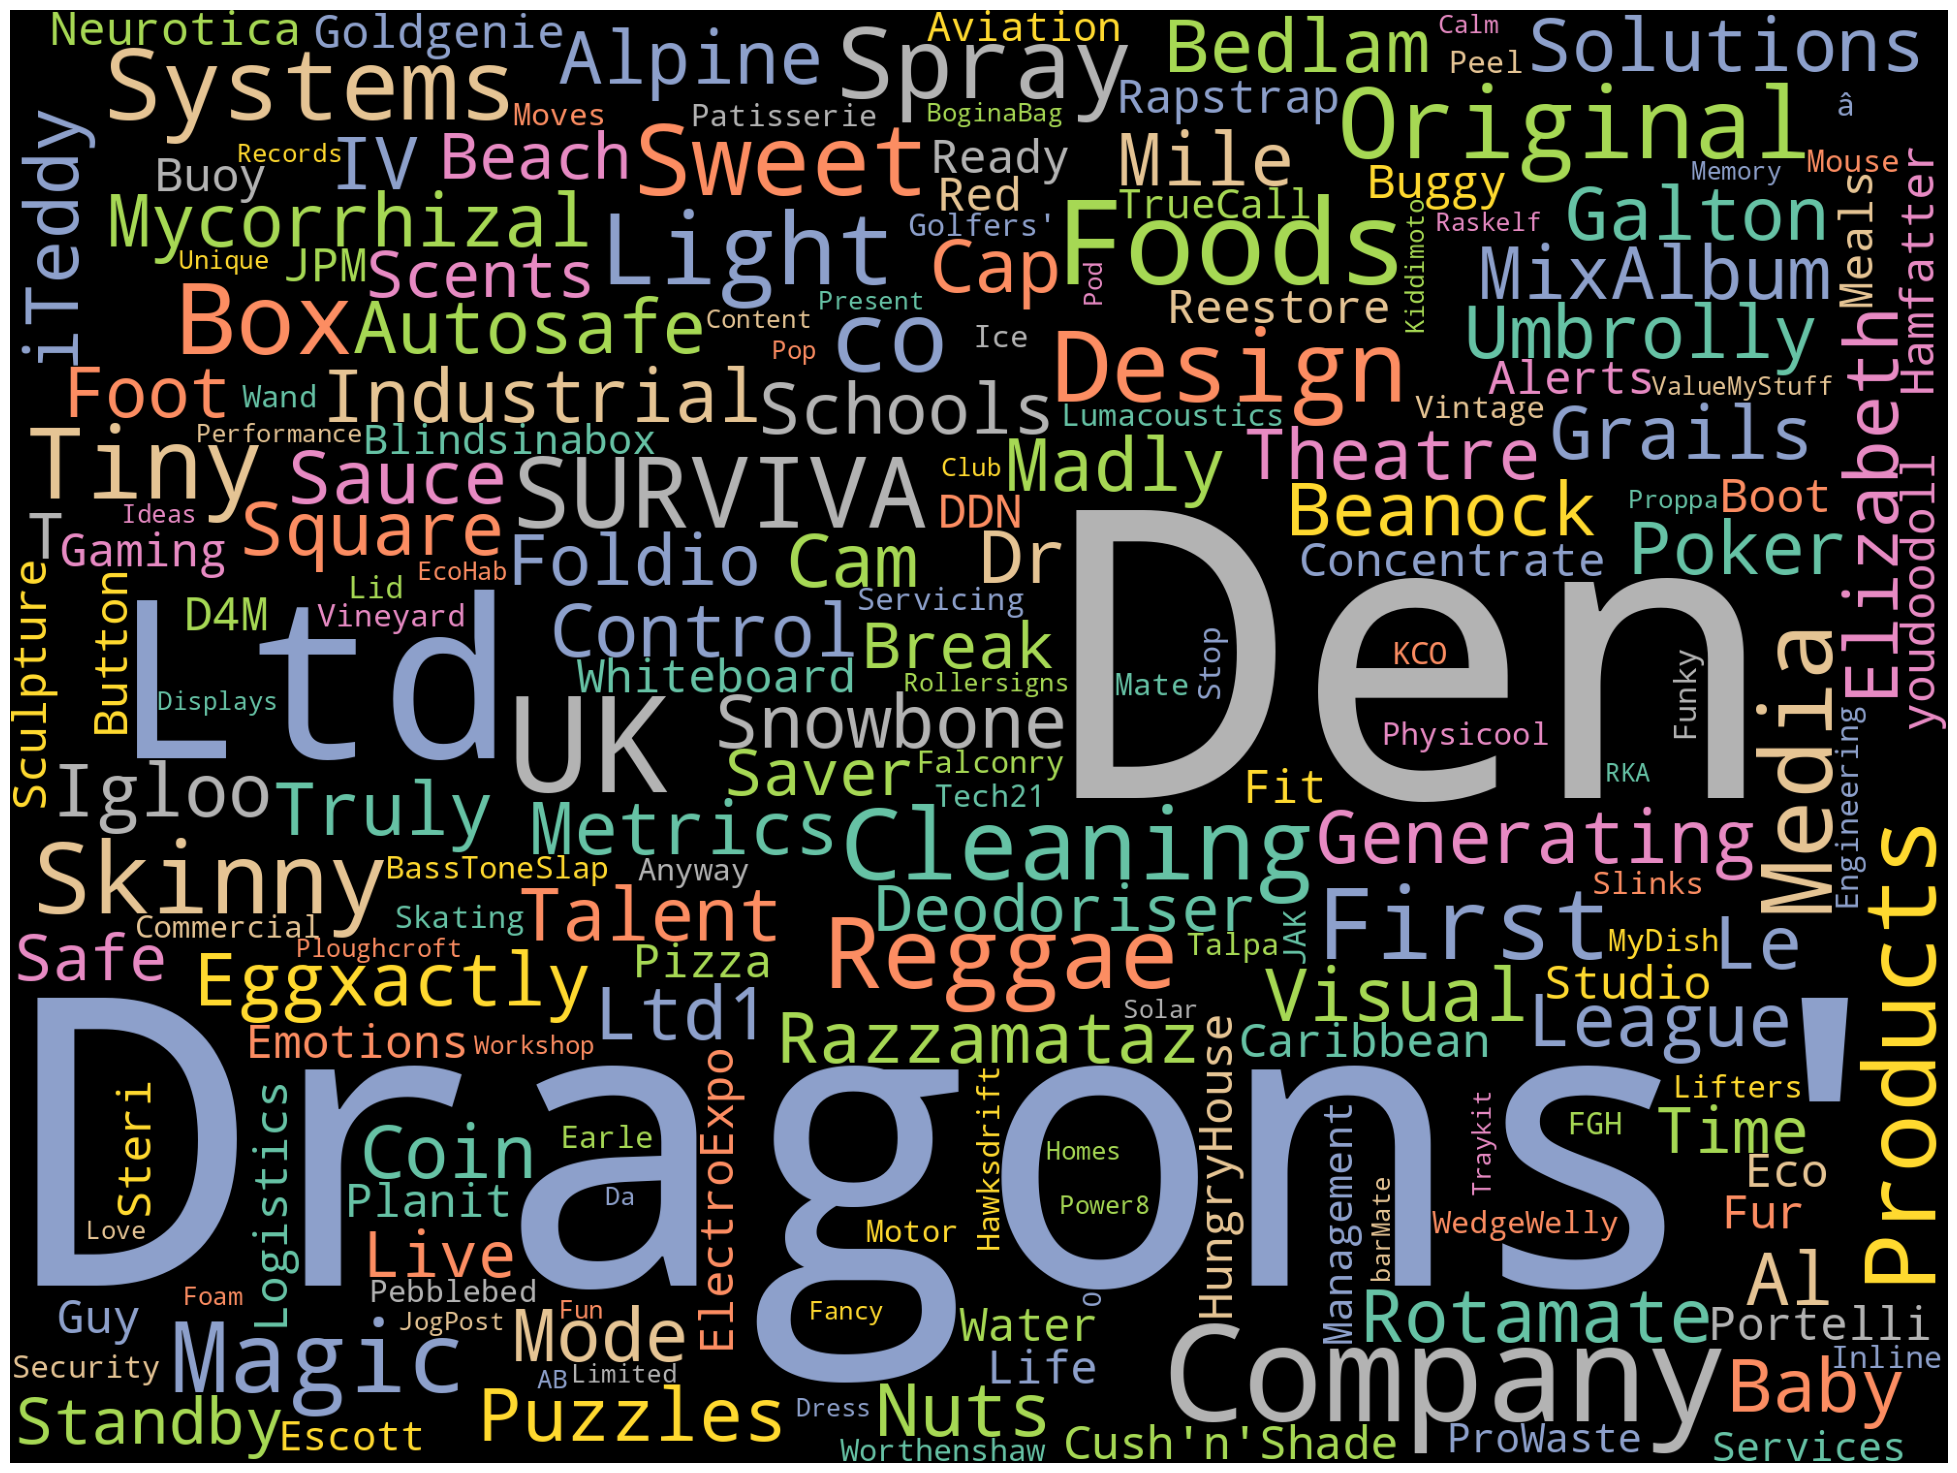

In [40]:
# Word cloud based on Startup Names, in all seasons
text = " Dragons' Den ".join(cat for cat in dragons_den['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
# # Word cloud based on Startup Names, in current/latest season (15th season)
# text = " Dragons' Den ".join(cat for cat in dragons_den_recent['Startup Name'])
# stop_words = list(STOPWORDS)
# wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2024).generate(text)
# plt.figure(figsize=(18,15))
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

Total investments by Peter Jones  29
Investment amount by Peter Jones £1,709,166.67
Equity received by Peter Jones 777.49 % in different companies

Company details:
------------------------------------------------------------------------------------------
                 Startup Name                Industry  Peter Jones Investment Amount
                     Umbrolly       Business Services                    75000.00000
            Visual Talent Ltd          Fashion/Beauty                   175000.00000
                  Square Mile          Lifestyle/Home                    75000.00000
       The Generating Company Fitness/Sports/Outdoors                    80000.00000
          Reggae Reggae Sauce       Food and Beverage                    25000.00000
                       iTeddy       Business Services                    70000.00000
               Scents of Time          Fashion/Beauty                    40000.00000
           Concentrate Design      Children/Education           

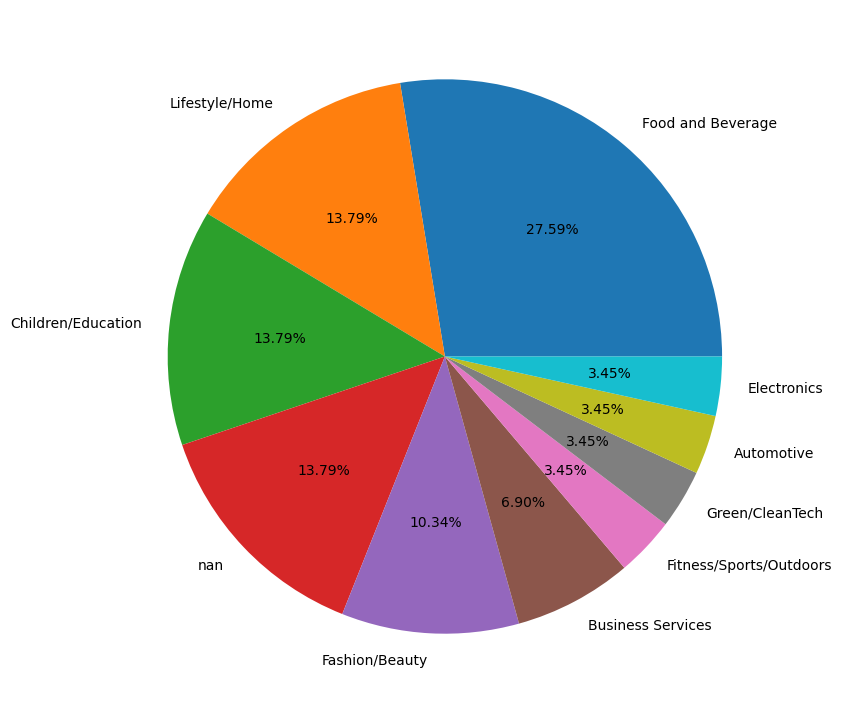

In [42]:
print("Total investments by Peter Jones", dragons_den[dragons_den['Peter Jones Investment Amount']>0][['Peter Jones Investment Amount']].count().to_string()[-3:])
print("Investment amount by Peter Jones", format_currency(dragons_den['Peter Jones Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Peter Jones", round(dragons_den['Peter Jones Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Peter Jones Investment Amount']>0][["Startup Name","Industry","Peter Jones Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nPeter Jones industry wise investments\n")
print(dragons_den[dragons_den['Peter Jones Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Peter Jones Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Peter Jones Investment Amount']>0] [["Startup Name","Peter Jones Investment Amount","Peter Jones Investment Equity"]].sort_values(by="Peter Jones Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Peter Jones Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Deborah Meaden  27
Investment amount by Deborah Meaden £1,447,500
Equity received by Deborah Meaden 607.5 % in different companies

Company details:
------------------------------------------------------------------------------------------
                Startup Name           Industry  Deborah Meaden Investment Amount
                    MixAlbum      Software/Tech                           75000.0
                  youdoodoll Children/Education                           35000.0
                    Reestore    Green/CleanTech                           25000.0
                 Steri Spray     Fashion/Beauty                           72500.0
           JPM Eco Logistics         Automotive                           50000.0
                  Buggy Boot  Business Services                           80000.0
            Magic Whiteboard Children/Education                           50000.0
ProWaste Management Services    Green/CleanTech                          100000.0
 

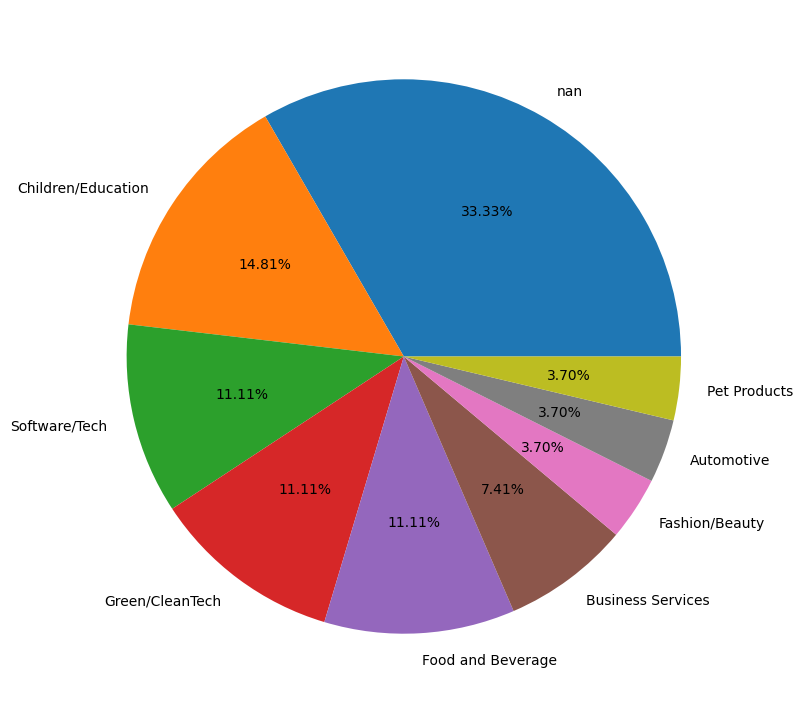

In [43]:
print("Total investments by Deborah Meaden", dragons_den[dragons_den['Deborah Meaden Investment Amount']>0][['Deborah Meaden Investment Amount']].count().to_string()[-3:])
print("Investment amount by Deborah Meaden", format_currency(dragons_den['Deborah Meaden Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Deborah Meaden", round(dragons_den['Deborah Meaden Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Deborah Meaden Investment Amount']>0][["Startup Name","Industry","Deborah Meaden Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nDeborah Meaden industry wise investments\n")
print(dragons_den[dragons_den['Deborah Meaden Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Deborah Meaden Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Deborah Meaden Investment Amount']>0] [["Startup Name","Deborah Meaden Investment Amount","Deborah Meaden Investment Equity"]].sort_values(by="Deborah Meaden Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Deborah Meaden Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Duncan Bannatyne  14
Investment amount by Duncan Bannatyne £995,000
Equity received by Duncan Bannatyne 371.25 % in different companies

Company details:
------------------------------------------------------------------------------------------
                Startup Name           Industry  Duncan Bannatyne Investment Amount
                    Umbrolly  Business Services                             75000.0
                       Igloo  Business Services                             80000.0
  Razzamataz Theatre Schools Children/Education                             50000.0
       Caribbean Ready Meals  Food and Beverage                             50000.0
                 ElectroExpo        Electronics                             75000.0
                     D4M Ltd  Business Services                             37500.0
                    Rapstrap    Green/CleanTech                             75000.0
                Blindsinabox     Lifestyle/Home               

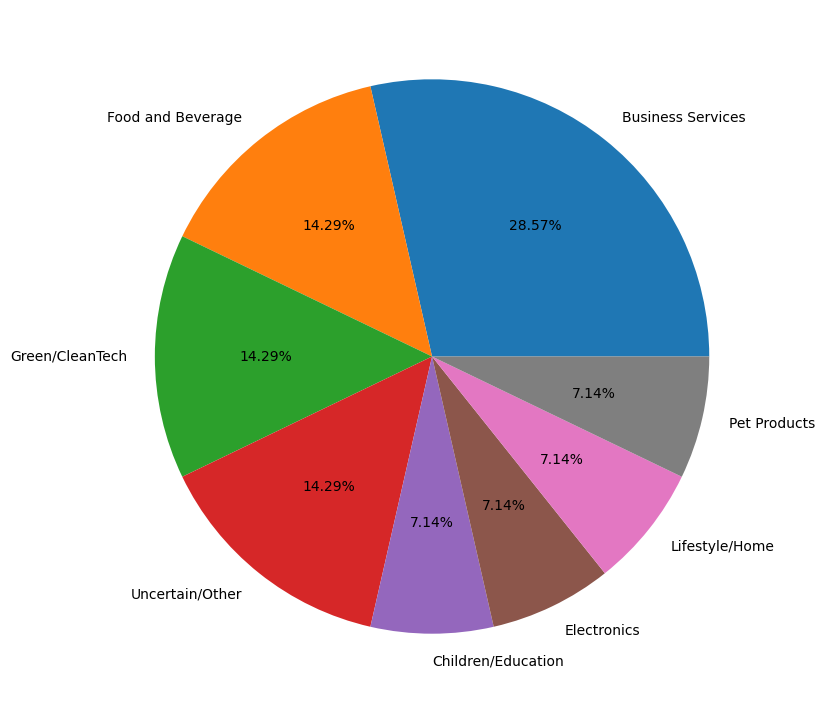

In [44]:
print("Total investments by Duncan Bannatyne", dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0][['Duncan Bannatyne Investment Amount']].count().to_string()[-3:])
print("Investment amount by Duncan Bannatyne", format_currency(dragons_den['Duncan Bannatyne Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Duncan Bannatyne", round(dragons_den['Duncan Bannatyne Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Duncan Bannatyne Investment Amount']>0][["Startup Name","Industry","Duncan Bannatyne Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nDuncan Bannatyne industry wise investments\n")
print(dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Duncan Bannatyne Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Duncan Bannatyne Investment Amount']>0] [["Startup Name","Duncan Bannatyne Investment Amount","Duncan Bannatyne Investment Equity"]].sort_values(by="Duncan Bannatyne Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Duncan Bannatyne Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Theo Paphitis  20
Investment amount by Theo Paphitis £1,191,666.67
Equity received by Theo Paphitis 400.83 % in different companies

Company details:
------------------------------------------------------------------------------------------
                 Startup Name                Industry  Theo Paphitis Investment Amount
                  Square Mile          Lifestyle/Home                      75000.00000
       The Generating Company Fitness/Sports/Outdoors                      80000.00000
                     MixAlbum           Software/Tech                      75000.00000
                       iTeddy       Business Services                      70000.00000
                       Foldio          Lifestyle/Home                      80000.00000
               Scents of Time          Fashion/Beauty                      40000.00000
                Gaming Alerts           Software/Tech                     200000.00000
                     Reestore         Gree

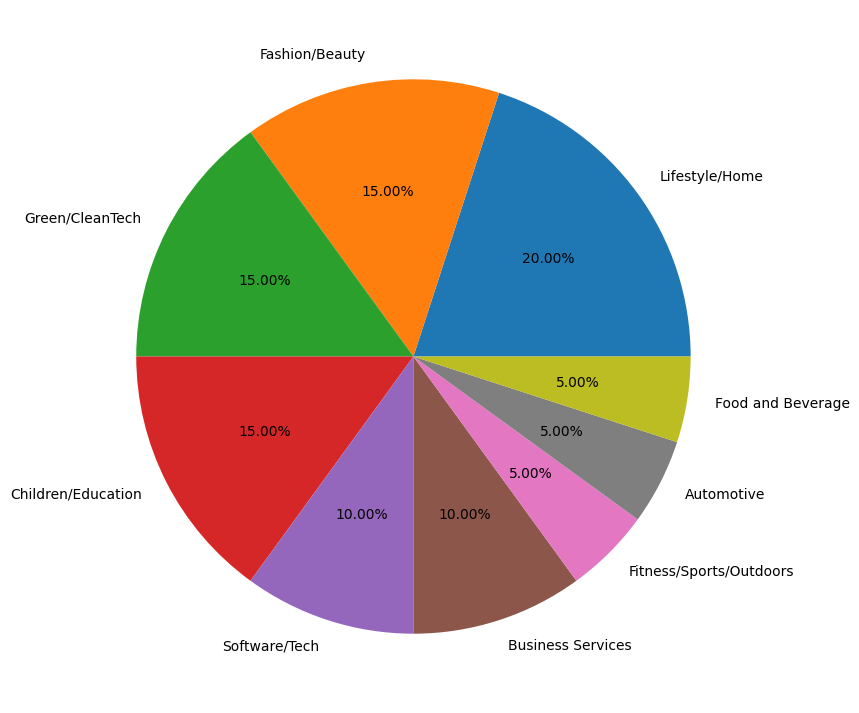

In [45]:
print("Total investments by Theo Paphitis", dragons_den[dragons_den['Theo Paphitis Investment Amount']>0][['Theo Paphitis Investment Amount']].count().to_string()[-3:])
print("Investment amount by Theo Paphitis", format_currency(dragons_den['Theo Paphitis Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Theo Paphitis", round(dragons_den['Theo Paphitis Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Theo Paphitis Investment Amount']>0][["Startup Name","Industry","Theo Paphitis Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nTheo Paphitis industry wise investments\n")
print(dragons_den[dragons_den['Theo Paphitis Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Theo Paphitis Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Theo Paphitis Investment Amount']>0] [["Startup Name","Theo Paphitis Investment Amount","Theo Paphitis Investment Equity"]].sort_values(by="Theo Paphitis Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Theo Paphitis Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Touker Suleyman   4
Investment amount by Touker Suleyman £225,000
Equity received by Touker Suleyman 135.0 % in different companies

Company details:
------------------------------------------------------------------------------------------
  Startup Name          Industry  Touker Suleyman Investment Amount
     BeamBlock               nan                            25000.0
Timberkits Ltd               nan                            40000.0
    Liquiproof    Fashion/Beauty                           100000.0
   Bad Brownie Food and Beverage                            60000.0
------------------------------------------------------------------------------------------

Touker Suleyman industry wise investments

Industry
nan                  2
Fashion/Beauty       1
Food and Beverage    1
Name: count, dtype: int64


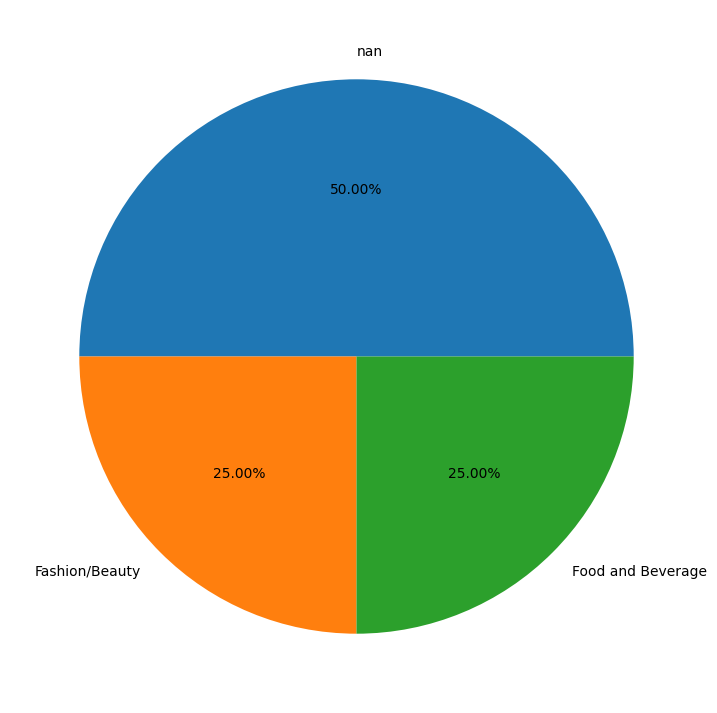

In [46]:
print("Total investments by Touker Suleyman", dragons_den[dragons_den['Touker Suleyman Investment Amount']>0][['Touker Suleyman Investment Amount']].count().to_string()[-3:])
print("Investment amount by Touker Suleyman", format_currency(dragons_den['Touker Suleyman Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Touker Suleyman", round(dragons_den['Touker Suleyman Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Touker Suleyman Investment Amount']>0][["Startup Name","Industry","Touker Suleyman Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nTouker Suleyman industry wise investments\n")
print(dragons_den[dragons_den['Touker Suleyman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Touker Suleyman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Touker Suleyman Investment Amount']>0] [["Startup Name","Touker Suleyman Investment Amount","Touker Suleyman Investment Equity"]].sort_values(by="Touker Suleyman Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Touker Suleyman Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Sara Davies   0
Investment amount by Sara Davies £0
Equity received by Sara Davies 0.0 % in different companies

Company details:
------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [Startup Name, Industry, Sara Davies Investment Amount]
Index: []
------------------------------------------------------------------------------------------

Sara Davies industry wise investments

Series([], Name: count, dtype: int64)


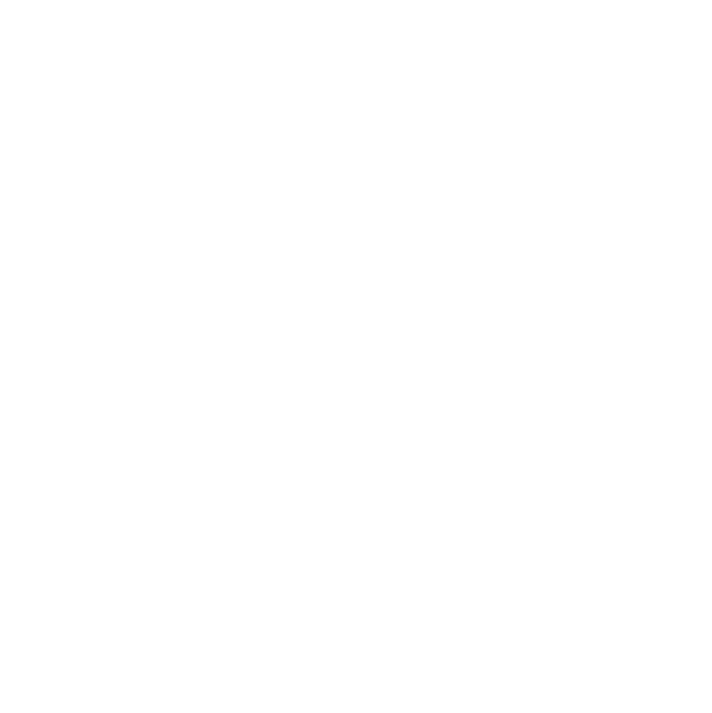

In [47]:
print("Total investments by Sara Davies", dragons_den[dragons_den['Sara Davies Investment Amount']>0][['Sara Davies Investment Amount']].count().to_string()[-3:])
print("Investment amount by Sara Davies", format_currency(dragons_den['Sara Davies Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by Sara Davies", round(dragons_den['Sara Davies Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(dragons_den.loc[dragons_den['Sara Davies Investment Amount']>0][["Startup Name","Industry","Sara Davies Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nSara Davies industry wise investments\n")
print(dragons_den[dragons_den['Sara Davies Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Sara Davies Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Sara Davies Investment Amount']>0] [["Startup Name","Sara Davies Investment Amount","Sara Davies Investment Equity"]].sort_values(by="Sara Davies Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Sara Davies Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by all Guests 30
Investment amount by all Guests £1,860,666.67
Equity received by all Guests 732.08 % in different companies

Company details:
--------------------------------------------------------------------------------------------
                 Startup Name           Industry  Guest Investment Amount                     Guest Name
                  Grails Ltd1     Fashion/Beauty             120000.00000   Doug Richard, Rachel Elnaugh
                   Le Beanock     Lifestyle/Home              54000.00000                 Rachel Elnaugh
        First Light Solutions  Business Services             100000.00000               Richard Farleigh
          Reggae Reggae Sauce  Food and Beverage              25000.00000               Richard Farleigh
                        Igloo  Business Services              80000.00000               Richard Farleigh
                    Goldgenie     Lifestyle/Home              60000.00000                     James Caan
        Car

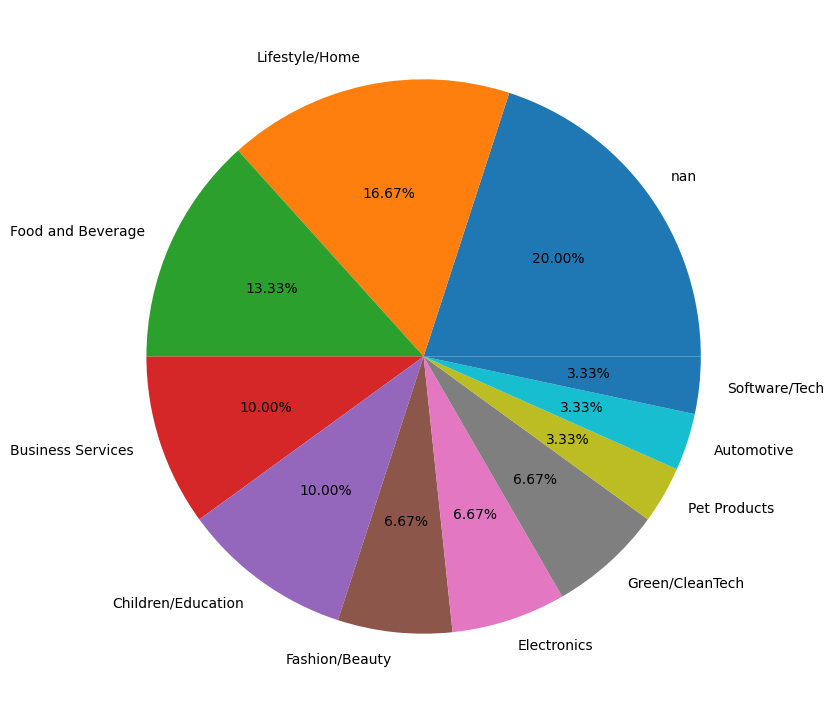

In [48]:
print("Total investments by all Guests", dragons_den[dragons_den['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(dragons_den['Guest Investment Amount'].sum(), 'GBP', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(dragons_den['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(dragons_den.loc[dragons_den['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(dragons_den[dragons_den['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
dragons_den[dragons_den['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = dragons_den.loc[dragons_den['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

In [49]:
# Top 10, guest Dragons who invested in most number of companies
dragons_den.loc[dragons_den['Guest Investment Amount'] > 1].groupby('Guest Name').size().nlargest(10)

Guest Name
James Caan                        11
Kelly Hoppen                       4
Nick Jenkins                       3
Piers Linney                       3
Richard Farleigh                   3
Hilary Devey                       2
Doug Richard, Rachel Elnaugh       1
Nick Jenkins, Sarah Willingham     1
Piers Linney, Kelly Hoppen         1
Rachel Elnaugh                     1
dtype: int64

In [50]:
# Investment amount by guests, in Millions
round(dragons_den.groupby(["Guest Name"])["Guest Investment Amount"].sum().sort_values(ascending=False)/1000000,2)

Guest Name
James Caan                        0.70
Piers Linney                      0.25
Richard Farleigh                  0.20
Nick Jenkins                      0.18
Kelly Hoppen                      0.12
Doug Richard, Rachel Elnaugh      0.12
Hilary Devey                      0.12
Piers Linney, Kelly Hoppen        0.06
Rachel Elnaugh                    0.05
Nick Jenkins, Sarah Willingham    0.05
Name: Guest Investment Amount, dtype: float64

Number of Dragons in Deal
1.0    54
2.0    35
3.0     1
Name: count, dtype: int64 

Number of Dragons in Deal
1.0    60%
2.0    39%
3.0     1%
Name: proportion, dtype: object


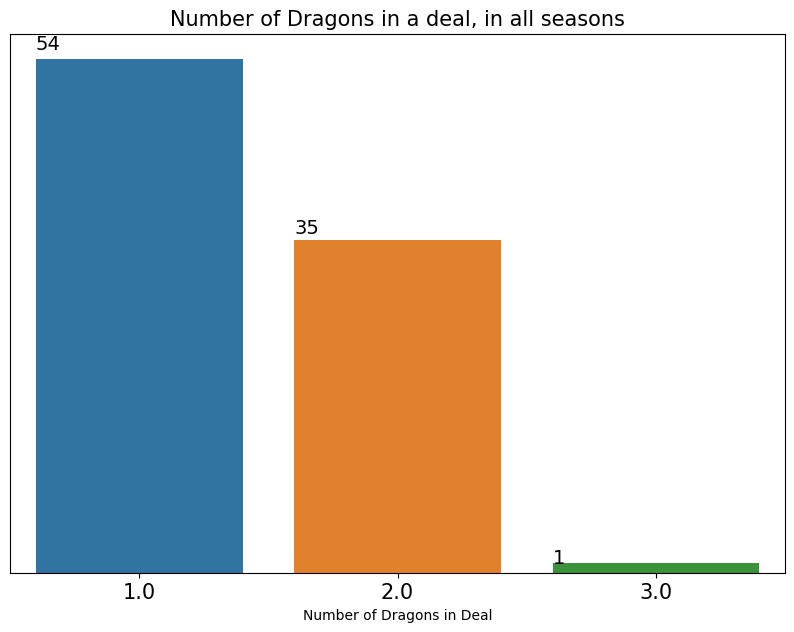

In [51]:
# Number of Dragons in a deal, in all seasons
print(dragons_den['Number of Dragons in Deal'].value_counts(), "\n")

# In percentage
print(round(dragons_den['Number of Dragons in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of Dragons in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = dragons_den, x = 'Number of Dragons in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [52]:
# All Dragons deals
print(dragons_den.loc[dragons_den['Number of Dragons in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

Empty DataFrame
Columns: [Season Number, Startup Name, Total Deal Amount, Total Deal Equity]
Index: []


In [53]:
# Dragons with most number of solo deals
amt_cols = dragons_den.columns[dragons_den.columns.str.contains(' Investment Amount')].tolist()
tmp = dragons_den.loc[dragons_den['Number of Dragons in Deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Peter Jones did most number of solo deals, than any other Dragon

Guest Investment Amount             15
Peter Jones Investment Amount       14
Deborah Meaden Investment Amount    13
dtype: int64

In [54]:
# Dragons with most number of episode presence, in all seasons
present_cols = dragons_den.columns[dragons_den.columns.str.endswith(' Present')].tolist()
tmp = dragons_den[present_cols]
tmp.sum().sort_values(ascending=False).nlargest(3)

# Peter Jones was there in most number of episodes

Guest Present             31.0
Peter Jones Present       29.0
Deborah Meaden Present    27.0
dtype: float64

In [55]:
# # Top 25 UK states of pitcher's
# tmp = dragons_den['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [56]:
# # Top 20 UK cities
# tmp = dragons_den['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
# fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 British cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
# fig.update_yaxes(title_text="")
# fig.update_xaxes(visible=False)
# fig.show()

In [57]:
# Most frequently asked amount, by startups
dragons_den.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (GBP) and Number times asked

Original Ask Amount
50000     43
100000    35
75000     19
60000     14
80000     13
150000     9
200000     9
70000      6
120000     4
37500      3
dtype: int64

In [58]:
# Most frequently offered equity, by startups
dragons_den.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
40.0    48
30.0    37
25.0    28
50.0    16
35.0    11
20.0     9
45.0     9
10.0     5
15.0     4
26.0     3
dtype: int64

In [59]:
# ✅ Most frequently invested amount, by Dragons
dragons_den.groupby('Total Deal Amount').size().nlargest(10)

# Dragons mostly invested more than 100K per deal

# Total Deal Amount (GBP) and Number times invested

Total Deal Amount
50000.0     24
100000.0    15
60000.0      9
80000.0      9
75000.0      6
150000.0     5
65000.0      3
200000.0     3
40000.0      2
45000.0      2
dtype: int64

In [60]:
# ✅ Most frequently received total equity, by Dragons
dragons_den.groupby('Total Deal Equity').size().nlargest(10)

# Dragons are expecting more than 20% equity, in a deal

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
40.00    24
30.00    18
25.00    12
50.00     7
35.00     6
20.00     4
45.00     4
10.00     3
15.00     3
33.33     2
dtype: int64

In [61]:
# Most frequently asked amount, deals received % and not received %
tmp2 = pd.crosstab(dragons_den['Original Ask Amount'], dragons_den['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

# Most frequest Deal Amount (in GBP) and % of deal received and not received

deal_percentage  no_deal_percentage
50000              56.0                44.0
100000             43.0                57.0
80000              62.0                38.0
60000              57.0                43.0
75000              26.0                74.0
150000             56.0                44.0
200000             33.0                67.0
65000             100.0                 0.0
70000              50.0                50.0
160000            100.0                 0.0

In [62]:
# Most frequently asked amount, deals received % and not received %
tmp2 = pd.crosstab(dragons_den['Original Offered Equity'], dragons_den['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

# Most frequest Offered Equity (in %) and % of deal received and not received

deal_percentage  no_deal_percentage
40.00             50.0                50.0
30.00             49.0                51.0
25.00             43.0                57.0
50.00             44.0                56.0
35.00             55.0                45.0
20.00             44.0                56.0
45.00             44.0                56.0
15.00             75.0                25.0
10.00             60.0                40.0
33.33             67.0                33.0

In [63]:
# Mostly successful combinations (of asked amount and offered equity)
dragons_den.loc[dragons_den['Got Deal'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in UK Dragons' Den, ask for 50K-150K with 30-40% equity ✅

Original Ask Amount  Original Offered Equity
50000                25.0                       7
                     30.0                       6
100000               40.0                       6
60000                30.0                       3
                     40.0                       3
100000               50.0                       3
150000               40.0                       3
50000                10.0                       2
                     20.0                       2
                     40.0                       2
dtype: int64

In [64]:
# Most frequently asked amount, by startups who could NOT get a deal
dragons_den.loc[dragons_den['Got Deal'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (GBP) and Number times asked (but rejected by Dragons) ❌

Original Ask Amount
100000    20
50000     19
75000     14
60000      6
200000     6
80000      5
150000     4
37500      3
70000      3
30000      2
dtype: int64

In [65]:
# Most frequently offered equity, by startups who could NOT get a deal
dragons_den.loc[dragons_den['Got Deal'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered (but rejected by Dragons) ❌

Original Offered Equity
40.0    24
30.0    19
25.0    16
50.0     9
20.0     5
35.0     5
45.0     5
10.0     2
26.0     2
12.5     1
dtype: int64

In [66]:
# Mostly rejected combinations (of asked amount and offered equity)
dragons_den.loc[dragons_den['Got Deal'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Dragons' Den US, don't ask for 100K with 50% equity or 50K with 20-40% equity 🔴

Original Ask Amount  Original Offered Equity
50000                40.0                       6
75000                40.0                       5
100000               30.0                       5
                     50.0                       5
50000                30.0                       4
                     20.0                       3
100000               40.0                       3
50000                25.0                       2
60000                35.0                       2
                     40.0                       2
dtype: int64

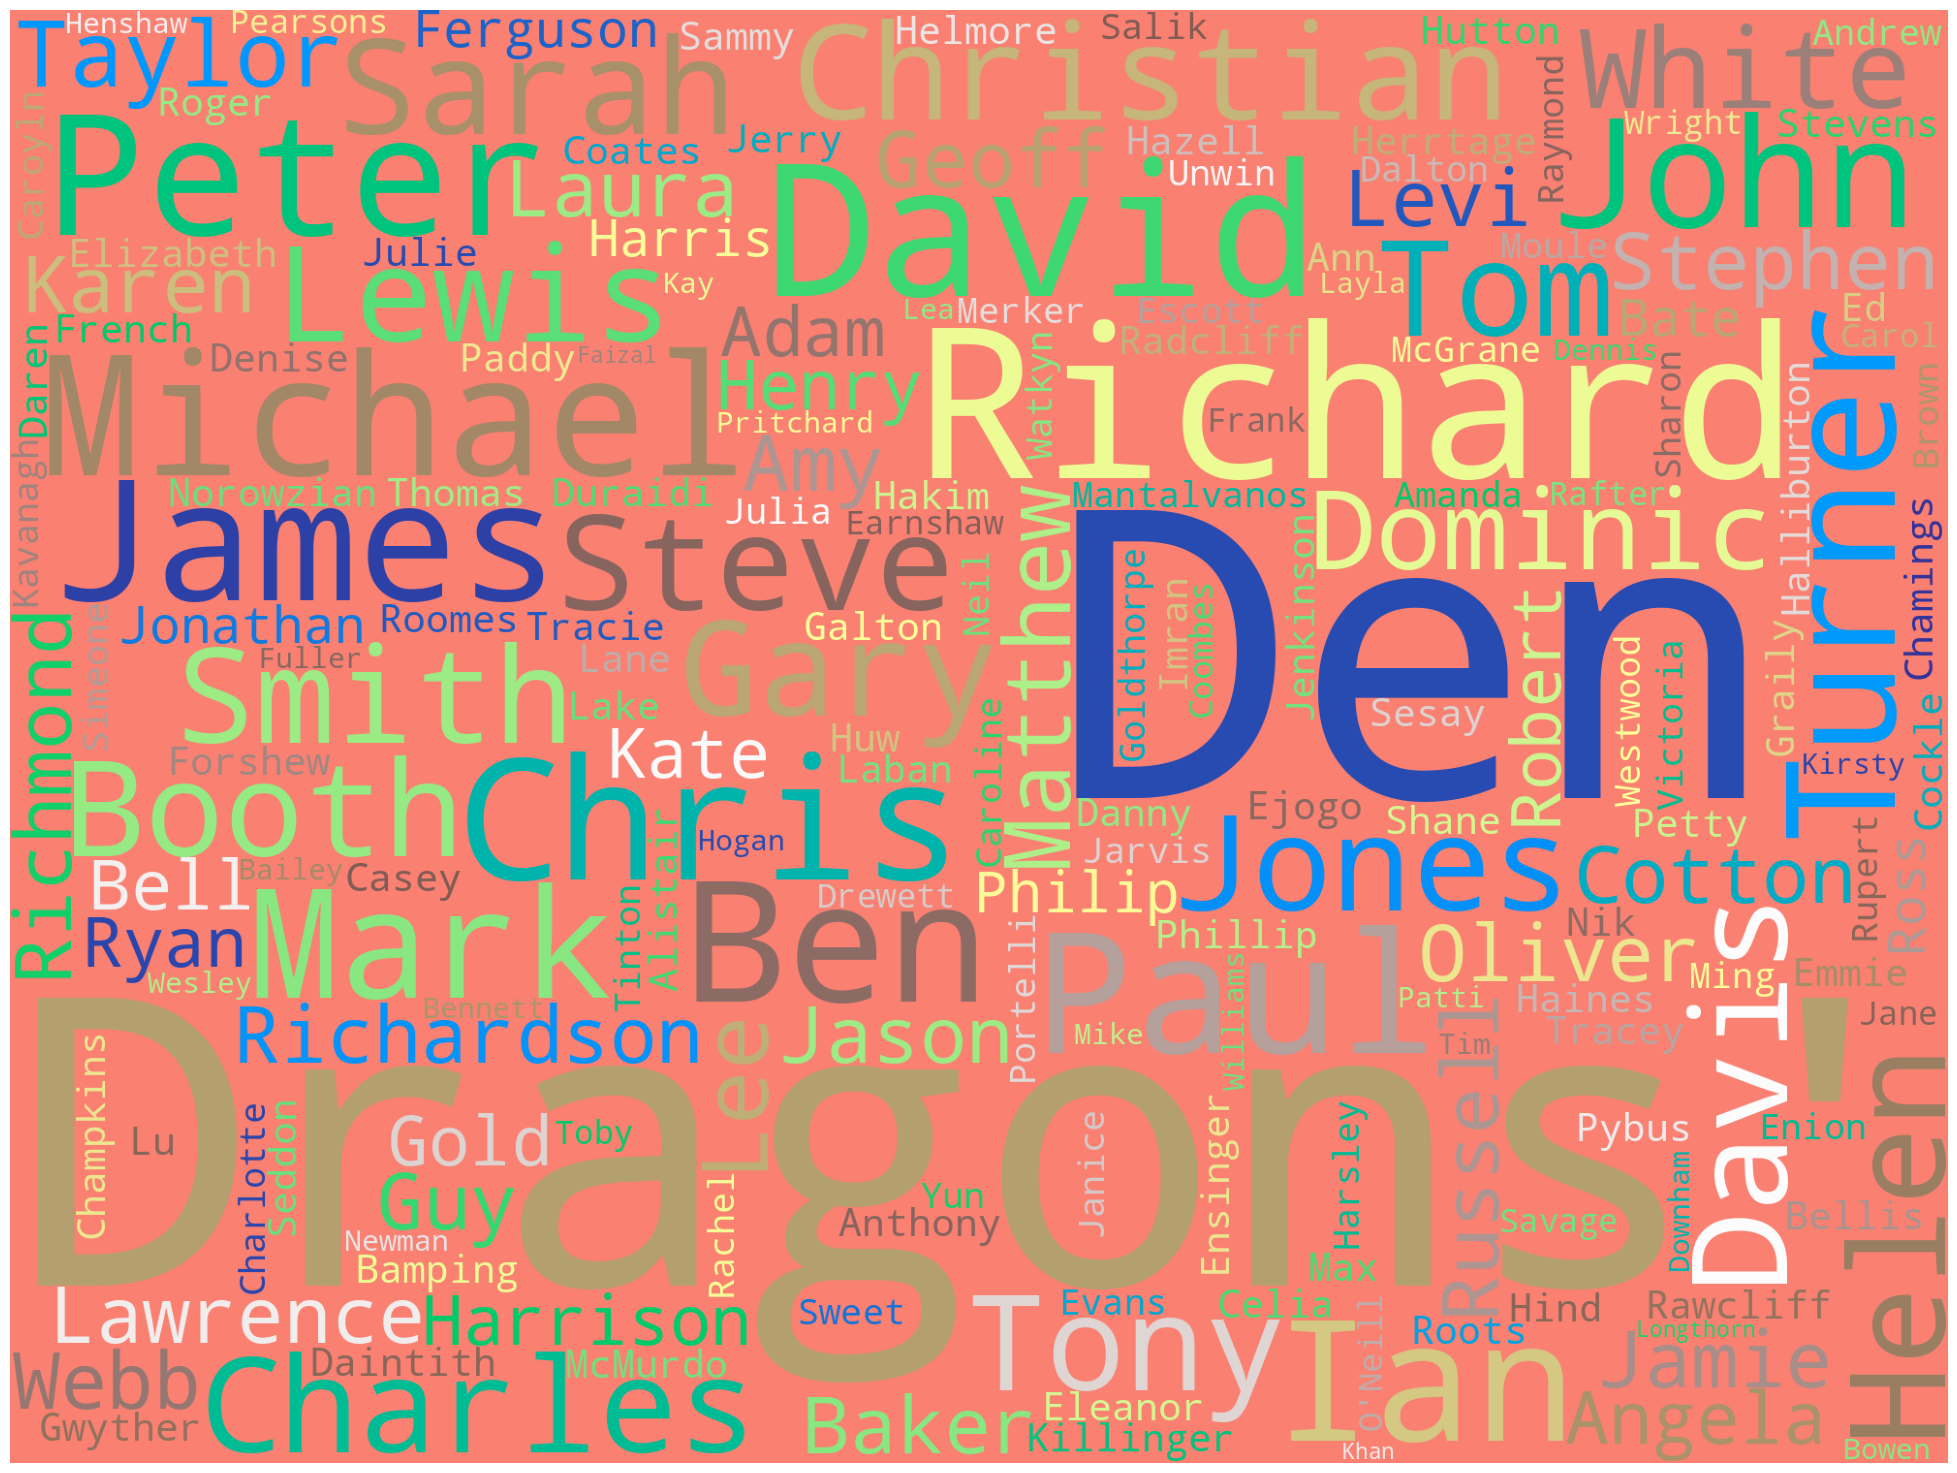

In [67]:
# Word cloud based on Pitcher name
text = " Dragons' Den ".join(cat for cat in dragons_den['Entrepreneur Names'].astype(str))
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='terrain_r', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [68]:
# Many (4) companies got more amount than they asked/expected
print(dragons_den.loc[dragons_den['Original Ask Amount'] < dragons_den["Total Deal Amount"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Original Ask Amount'] < dragons_den["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    4
dtype: int64


Season Number                   Startup Name  Original Ask Amount  \
48               6                      Neurotica                56000   
55               6  Guy Portelli Sculpture Studio                70000   
58               6                       Tiny Box                53000   
171             13                 Timberkits Ltd                25000   

     Total Deal Amount  
48             75000.0  
55             80000.0  
58             60000.0  
171            40000.0

In [69]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
dragons_den.loc[dragons_den['Original Offered Equity'] < dragons_den["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Original Offered Equity, Total Deal Equity]
Index: []

In [70]:
# Below (86) companies got the same valuation they requested (with or without loan)
print(dragons_den.loc[dragons_den['Valuation Requested'] == dragons_den["Deal Valuation"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Valuation Requested'] == dragons_den["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    86
dtype: int64


Season Number       Startup Name  Valuation Requested  Deal Valuation
0                1           Umbrolly               375000        375000.0
1                1        Grails Ltd1               300000        300000.0
2                1         Le Beanock               110204        110204.0
7                1  Visual Talent Ltd               437500        437500.0
8                2        Square Mile               375000        375000.0
..             ...                ...                  ...             ...
179             13  Latest Free Stuff               500000        500000.0
182             13           Tegology               180000        180000.0
183             13       Masons Beans               250000        250000.0
184             13        Slappie Ltd               111111        111111.0
186             13        Bad Brownie               200000        200000.0

[86 rows x 4 columns]

In [71]:
# There are 4 companies which got more valuation than they pitched
print(dragons_den.loc[dragons_den['Valuation Requested'] < dragons_den["Deal Valuation"]][["Startup Name"]].count())
dragons_den.loc[dragons_den['Valuation Requested'] < dragons_den["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    4
dtype: int64


Season Number                   Startup Name  Valuation Requested  \
48               6                      Neurotica               160000   
55               6  Guy Portelli Sculpture Studio               280000   
58               6                       Tiny Box               132500   
171             13                 Timberkits Ltd                83333   

     Deal Valuation  
48         214286.0  
55         320000.0  
58         150000.0  
171        133333.0

In [72]:
# # Episodes which got most TRP
# print("Maximum viewership in UK:", dragons_den['UK Viewership'].max(), "\n")
# print(dragons_den.loc[dragons_den['UK Viewership']>=dragons_den['UK Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","UK Viewership"]].head(18).sort_values("UK Viewership",ascending=False).to_string(index=False))

In [73]:
# # Episodes which got least TRP
# print("Minimum viewership in United Kingdom:", dragons_den['UK Viewership'].min(), "\n")
# print(dragons_den.loc[dragons_den['UK Viewership']<=dragons_den['UK Viewership'].min()+0.3][["Season Number","Episode Number","Startup Name","UK Viewership"]].head(18).sort_values("UK Viewership").to_string(index=False))

Multiple Entrepreneurs
0    117
1     71
Name: count, dtype: Int64 

Multiple Entrepreneurs
0    62%
1    38%
Name: proportion, dtype: object


<Axes: ylabel='count'>

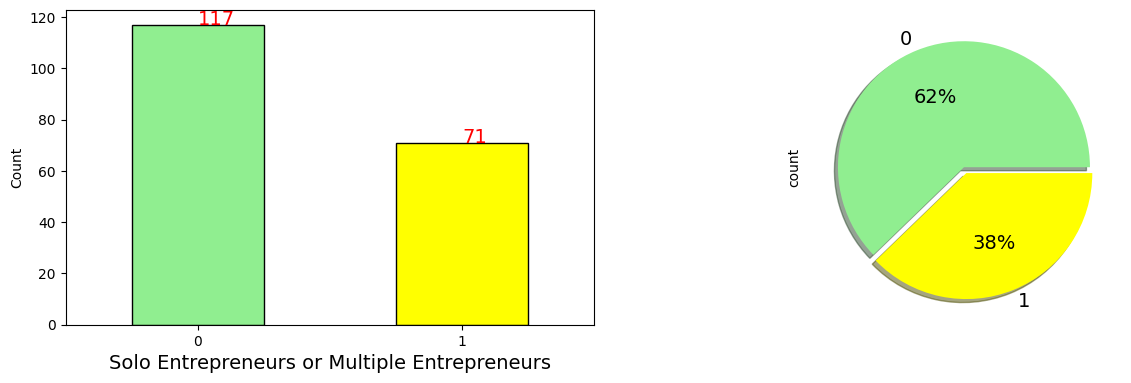

In [74]:
# Solo or multiple Entrepreneurs ?
print(dragons_den['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(dragons_den['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
dragons_den["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["lightgreen","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(dragons_den["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")
    
ax2 = plt.subplot(222)
dragons_den["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["lightgreen","yellow"], shadow=True, fontsize=14)

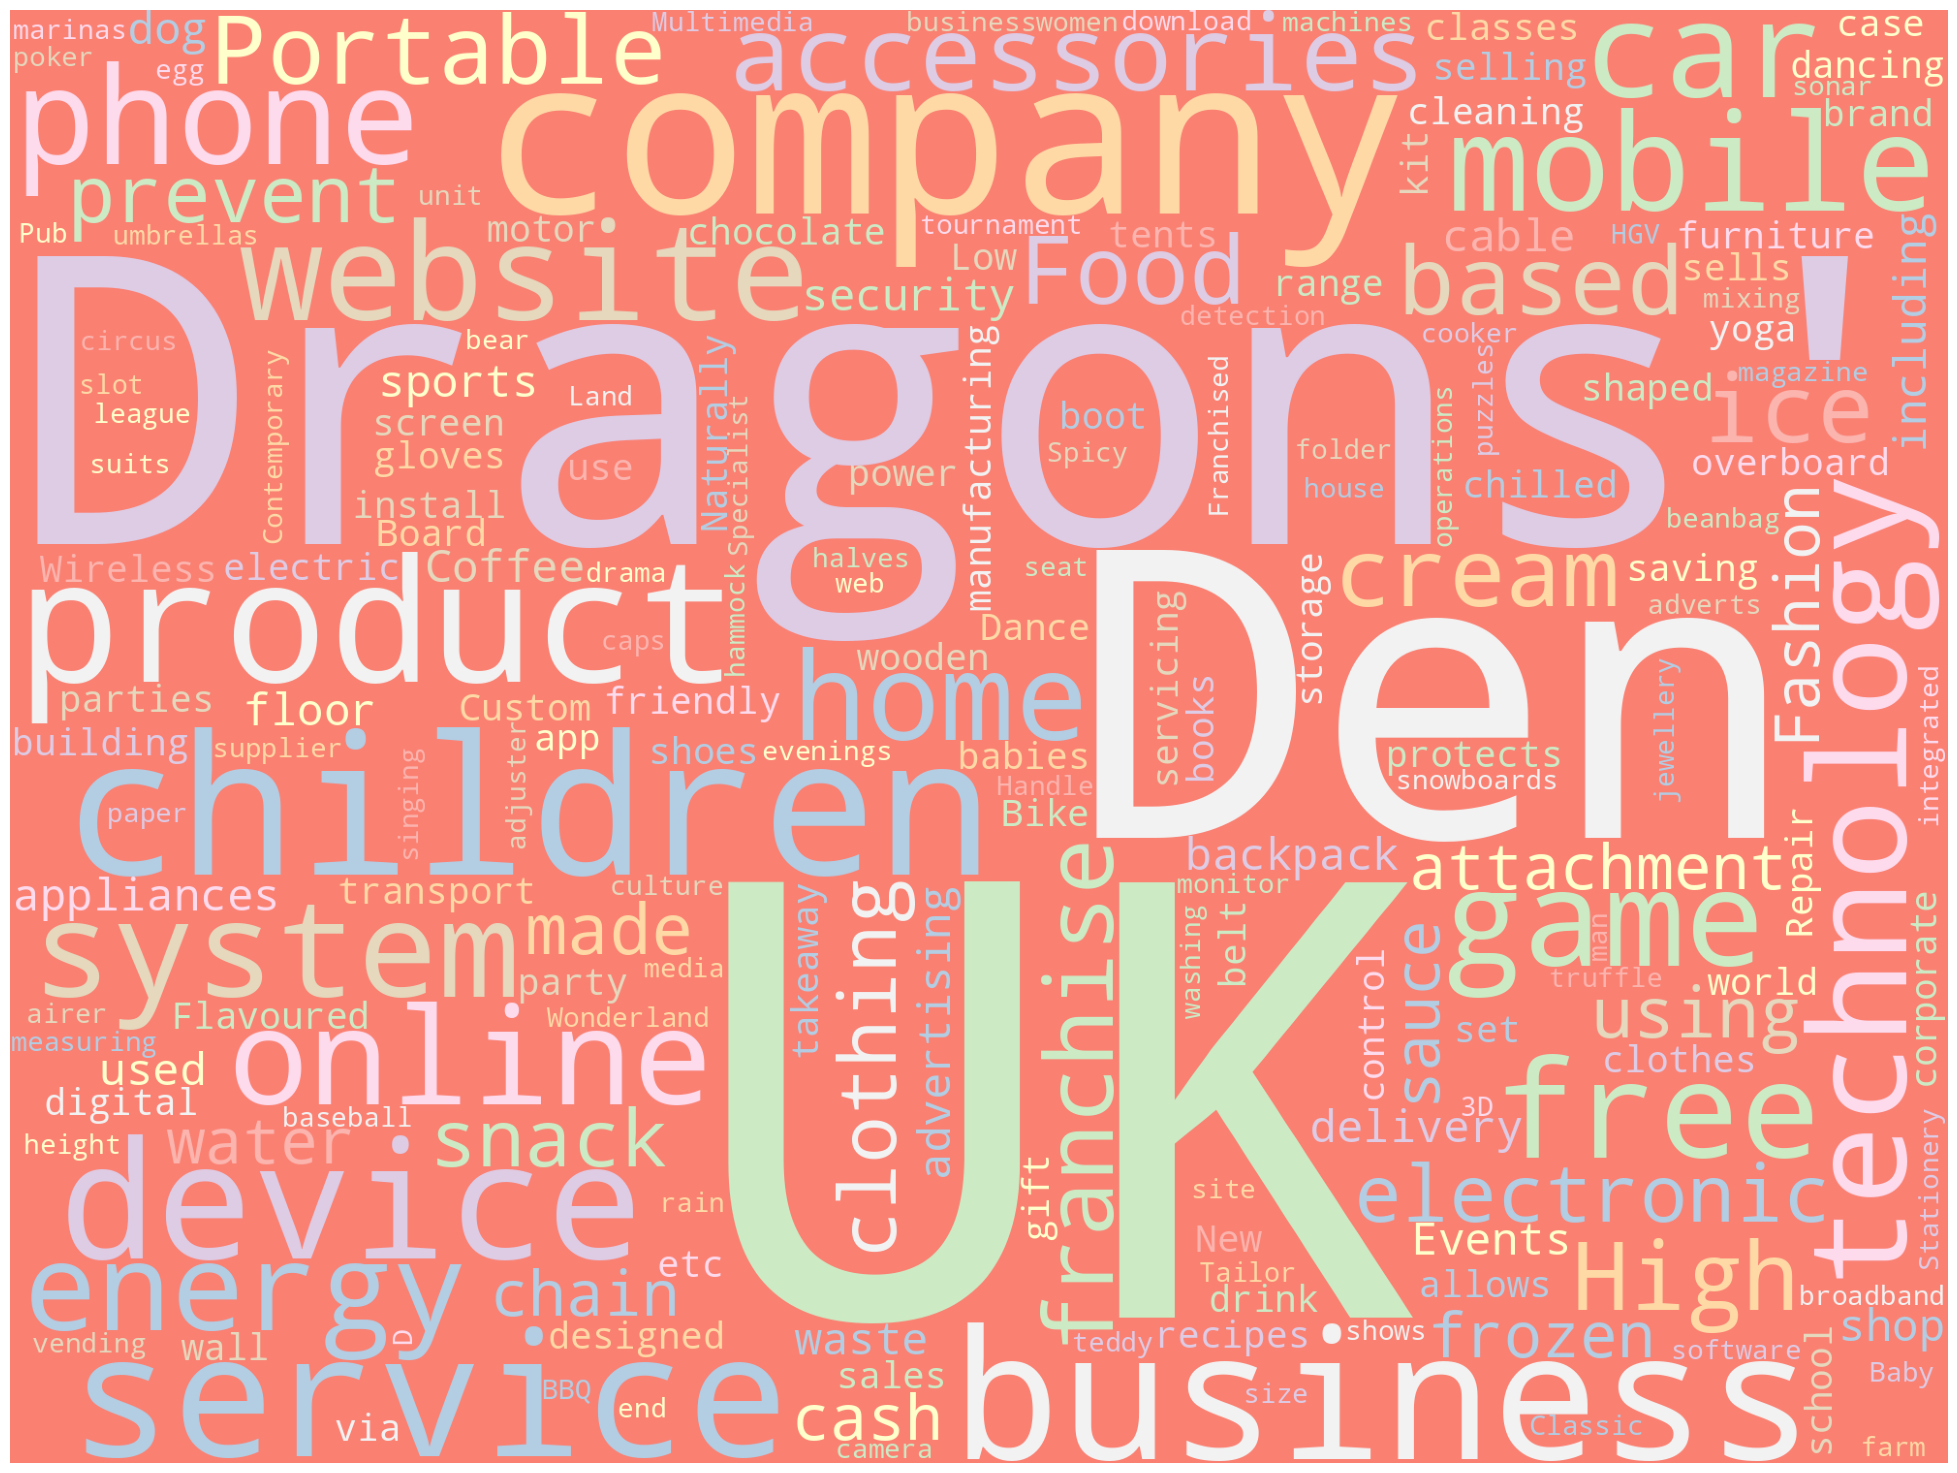

In [75]:
# Word cloud based on Business Description of startups came in all seasons
text = " Dragons' Den UK ".join(cat for cat in dragons_den.loc[dragons_den['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [76]:
# Correlation matrix
dragons_den.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

In [77]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.7.5
# seaborn version: 0.12.2
# plotly version: 5.22.0

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.7.5
seaborn version: 0.12.2
plotly version: 5.22.0


In [78]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [79]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [80]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [81]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Number of Dragons in Deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [82]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Investment Amount Per Dragon'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [83]:
dragons_den.loc[(dragons_den['Got Deal'] == 1) & (dragons_den['Equity Per Dragon'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [84]:
dragons_den.loc[round(dragons_den['Total Deal Amount'].fillna(0),1) != round(dragons_den['Peter Jones Investment Amount'].fillna(0) + dragons_den['Deborah Meaden Investment Amount'].fillna(0) + dragons_den['Duncan Bannatyne Investment Amount'].fillna(0) + dragons_den['Theo Paphitis Investment Amount'].fillna(0) + dragons_den['Touker Suleyman Investment Amount'].fillna(0) + dragons_den['Sara Davies Investment Amount'].fillna(0) + dragons_den['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [85]:
dragons_den.loc[round(dragons_den['Total Deal Equity'].fillna(0),1) != round(dragons_den['Peter Jones Investment Equity'].fillna(0) + dragons_den['Deborah Meaden Investment Equity'].fillna(0) + dragons_den['Duncan Bannatyne Investment Equity'].fillna(0) + dragons_den['Theo Paphitis Investment Equity'].fillna(0) + dragons_den['Touker Suleyman Investment Equity'].fillna(0) + dragons_den['Sara Davies Investment Equity'].fillna(0) + dragons_den['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [86]:
dragons_den.loc[(dragons_den['Guest Investment Amount'].notnull()) & (dragons_den['Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [87]:
dragons_den.loc[(dragons_den['Guest Investment Amount'].isnull()) & (dragons_den['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [88]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] != 0) & (dragons_den['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [89]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] == 0) & (dragons_den['Entrepreneur Names'].notnull() & dragons_den['Entrepreneur Names'].str.contains(' and'))]

Season Number                Startup Name  Episode Number  Pitch Number  \
140             11  Vini & Bal's Rustic Indian               9           141   

    Season Start Season End Original Air Date           Industry  \
140    11-Aug-13   2-Mar-14          9-Feb-14  Food and Beverage   

                     Business Description  Company Website  Pitchers Gender  \
140  Chilled, fresh Indian cook-in sauces              NaN              NaN   

     Pitchers Average Age  Pitchers City  Pitchers State Entrepreneur Names  \
140                   NaN            NaN             NaN       Vini and Bal   

     Multiple Entrepreneurs  UK Viewership  Original Ask Amount  \
140                       0            NaN                50000   

     Original Offered Equity  Valuation Requested  Got Deal  \
140                     30.0               166667         1   

     Total Deal Amount  Total Deal Equity  Deal Valuation  \
140            50000.0               30.0        166667.0   

     Number of Dragons in Deal  ...  Advisory Shares Equity  Loan  \
140                        1.0  ...                     NaN   NaN   

     Deal Has Conditions  Peter Jones Investment Amount  \
140                  NaN                            NaN   

     Peter Jones Investment Equity Deborah Meaden Investment Amount  \
140                            NaN                              NaN   

     Deborah Meaden Investment Equity  Duncan Bannatyne Investment Amount  \
140                               NaN                                 NaN   

     Duncan Bannatyne Investment Equity  Theo Paphitis Investment Amount  \
140                                 NaN                              NaN   

     Theo Paphitis Investment Equity  Touker Suleyman Investment Amount  \
140                              NaN                                NaN   

     Touker Suleyman Investment Equity  Sara Davies Investment Amount  \
140                                NaN                            NaN   

     Sara Davies Investment Equity  Guest Investment Amount  \
140                            NaN                  50000.0   

     Guest Investment Equity    Guest Name  Peter Jones Present  \
140                     30.0  Piers Linney                  NaN   

     Deborah Meaden Present Duncan Bannatyne Present  Theo Paphitis Present  \
140                     NaN                      NaN                    NaN   

     Touker Suleyman Present  Sara Davies Present  Guest Present  
140                      NaN                  NaN            1.0  

[1 rows x 53 columns]

In [90]:
dragons_den.loc[(dragons_den['Multiple Entrepreneurs'] == 1) & (dragons_den['Entrepreneur Names'].str.contains(' and ')==False)]

Season Number        Startup Name  Episode Number  Pitch Number  \
57               6        Blindsinabox               7            58   
82               8          WedgeWelly               5            83   
148             12  The Teabox Company               3           149   

    Season Start Season End Original Air Date           Industry  \
57     21-Jul-08   8-Sep-08          1-Sep-08     Lifestyle/Home   
82     14-Jul-10  13-Sep-10          9-Aug-10     Fashion/Beauty   
148    20-Jul-14  15-Mar-15          3-Aug-14  Food and Beverage   

                 Business Description  Company Website  Pitchers Gender  \
57   Temporary, easy-to-install blind              NaN              NaN   
82      Wellington boots with a wedge              NaN              NaN   
148                    Loose leaf tea              NaN              NaN   

     Pitchers Average Age  Pitchers City  Pitchers State  \
57                    NaN            NaN             NaN   
82                    NaN            NaN             NaN   
148                   NaN            NaN             NaN   

                                  Entrepreneur Names  Multiple Entrepreneurs  \
57   Dominic Lawrence, Simeone Salik & Janice Dalton                       1   
82              Sarah & Mike Longthorn & Laura Booth                       1   
148                       Philip Perera & Omar Farag                       1   

     UK Viewership  Original Ask Amount  Original Offered Equity  \
57             NaN                40000                     50.0   
82             NaN                65000                     30.0   
148            NaN                50000                     25.0   

     Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
57                 80000         1            40000.0               50.0   
82                216667         1            65000.0               30.0   
148               200000         0                NaN                NaN   

     Deal Valuation  Number of Dragons in Deal  ...  Advisory Shares Equity  \
57          80000.0                        2.0  ...                     NaN   
82         216667.0                        1.0  ...                     NaN   
148             NaN                        NaN  ...                     NaN   

     Loan  Deal Has Conditions  Peter Jones Investment Amount  \
57    NaN                  NaN                            NaN   
82    NaN                  NaN                            NaN   
148   NaN                  NaN                            NaN   

     Peter Jones Investment Equity Deborah Meaden Investment Amount  \
57                             NaN                              NaN   
82                             NaN                              NaN   
148                            NaN                              NaN   

     Deborah Meaden Investment Equity  Duncan Bannatyne Investment Amount  \
57                                NaN                             20000.0   
82                                NaN                                 NaN   
148                               NaN                                 NaN   

     Duncan Bannatyne Investment Equity  Theo Paphitis Investment Amount  \
57                                 25.0                              NaN   
82                                  NaN                          65000.0   
148                                 NaN                              NaN   

     Theo Paphitis Investment Equity  Touker Suleyman Investment Amount  \
57                               NaN                                NaN   
82                              30.0                                NaN   
148                              NaN                                NaN   

     Touker Suleyman Investment Equity  Sara Davies Investment Amount  \
57                                 NaN                            NaN   
82                                 NaN                            NaN   
148  

In [91]:
dragons_den.loc[(dragons_den['Got Deal'] != 0) & (dragons_den['Got Deal'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [92]:
dragons_den.loc[(dragons_den['Got Deal'] == 0) & (dragons_den['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [93]:
dragons_den.loc[(dragons_den['Pitchers Gender'] == 'Mixed Team') & (dragons_den['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [94]:
dragons_den.loc[(dragons_den['Got Deal'] == 0) & (dragons_den['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]

In [95]:
dragons_den.loc[dragons_den['Total Deal Amount'] < dragons_den["Loan"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, UK Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Dragons in Deal, Investment Amount Per Dragon, Equity Per Dragon, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Peter Jones Investment Amount, Peter Jones Investment Equity, Deborah Meaden Investment Amount, Deborah Meaden Investment Equity, Duncan Bannatyne Investment Amount, Duncan Bannatyne Investment Equity, Theo Paphitis Investment Amount, Theo Paphitis Investment Equity, Touker Suleyman Investment Amount, Touker Suleyman Investment Equity, Sara Davies Investment Amount, Sara Davies Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Peter Jones Present, Deborah Meaden Present, Duncan Bannatyne Present, Theo Paphitis Present, Touker Suleyman Present, Sara Davies Present, Guest Present]
Index: []

[0 rows x 53 columns]